# Problem 1 

This problem builds on the code developed in lecture to solve the potential on a square plate.

The top edge of the square plate ($x=0$) is fixed at 100 V, and the other 3 edges are grounded at 0 V.

Unlike the code from class, we will assume a fixed edge length $L$, and we will calculate a specific step size $h = L/N_\text{max}$ to make things easier in part (b).

A simple way to do that is to create two separate `meshgrid`s, one for the integer indices and one for the real coordinates.

## (a) Numerical Solution

We get a reasonable picture with 51 points.  Note that the potential does not follow a linear slope from 100 V to 0 V, because the potentials on the sides are fixed at 0 V.
(If you want to check this, set the potentials on the side to fall linearly from 100 V to 0 V across the plate.)

<IPython.core.display.Javascript object>


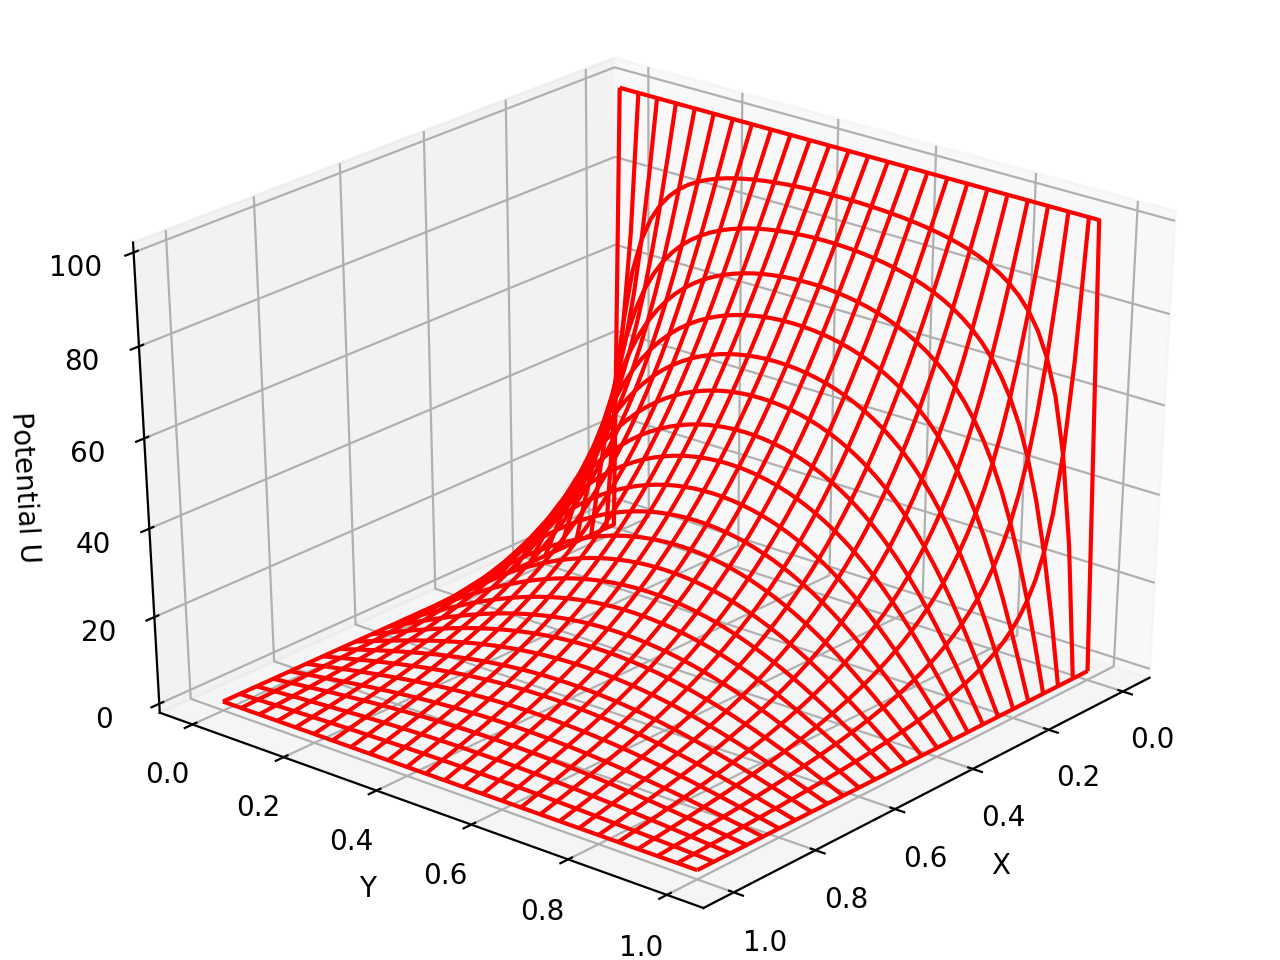

<IPython.core.display.Javascript object>


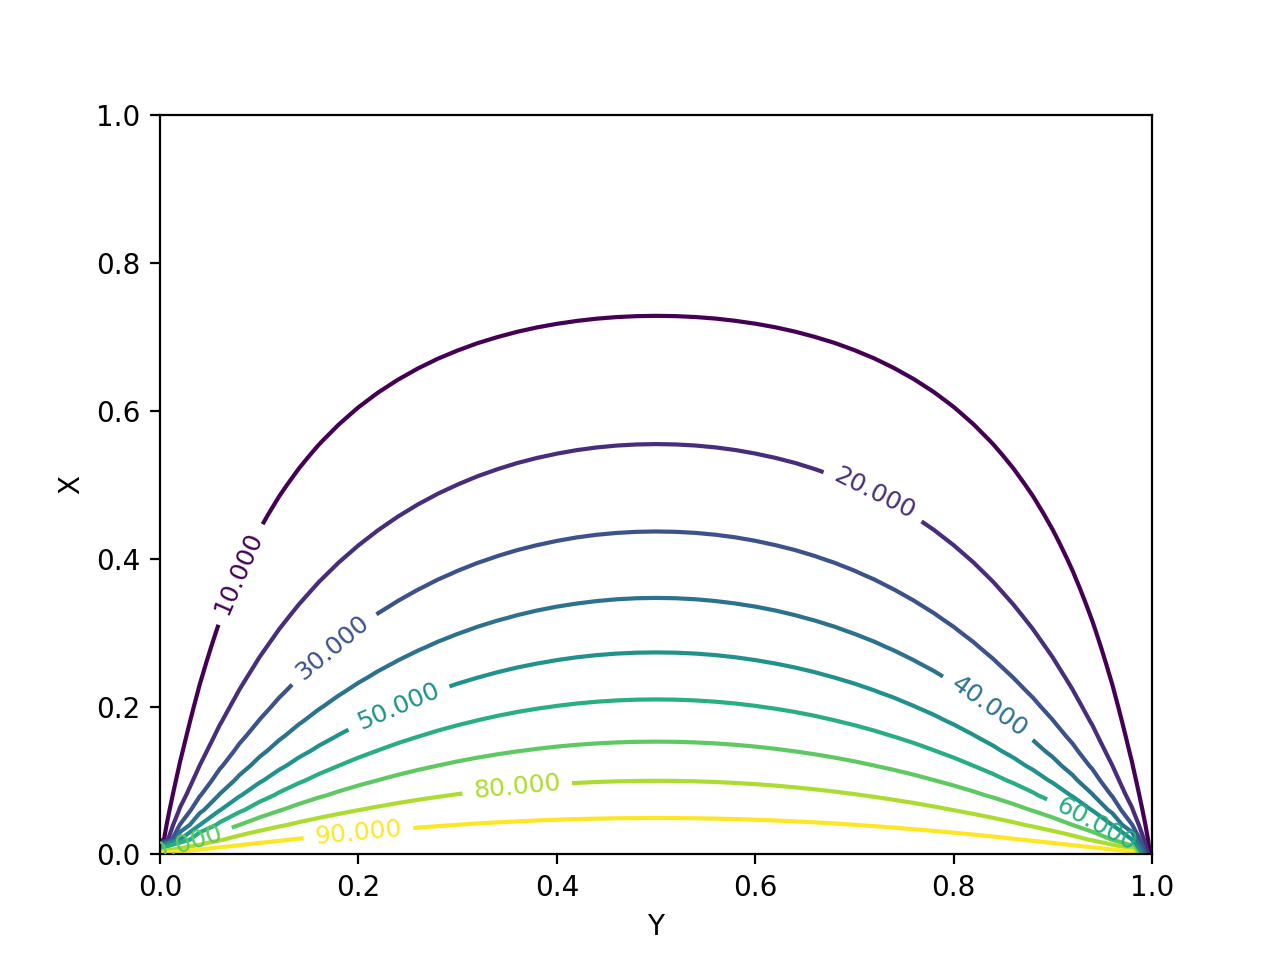

In [1]:
%matplotlib notebook

from pylab import *
from mpl_toolkits.mplot3d import Axes3D 

L = 1.0
Nmax = 51
Niter = 1000
V = zeros((Nmax, Nmax), float)   

h = L/Nmax

for k in range(0, Nmax-1): 
    V[0,k] = 100.0                      # fixed potential line at 100V
    
for iter in range(Niter):               # iterations over algorithm
    for i in range(1, Nmax-1): 
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  

xi = range(0, Nmax)
yi = range(0, Nmax)
XI, YI = meshgrid(xi, yi)               # grid of integer indices
x = linspace(0, L, num=Nmax)
y = linspace(0, L, num=Nmax)
X, Y = meshgrid(x, y)                   # grid of real coordinates

def functz(V):                          # Function returns V(x, y)
    z = V[XI,YI]                        
    return z

Z = functz(V)                          
fig = plt.figure()                      # Create figure
ax = Axes3D(fig)                        
ax.plot_wireframe(X, Y, Z, color = 'r') 
ax.set_xlabel('X')                      
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
ax.view_init(30, 40)
plt.show()

plt.figure()
partAcontour = plt.contour(Y, X, Z, levels=linspace(0.,100.,11))
plt.xlabel('Y')
plt.ylabel('X')
plt.clabel(partAcontour, fontsize=9, inline=1)
plt.show()

## (b) Step Size Study

We need to rework the code to allow us to change the step size $h$ (or, equivalently, $N_\text{max}$) more easily and to check for stability and accuracy.

Since we do not have the analytic result until part (e), we will define "accuracy" as having the contours reaching sufficiently far along the plate.

This will take a minute...


<IPython.core.display.Javascript object>


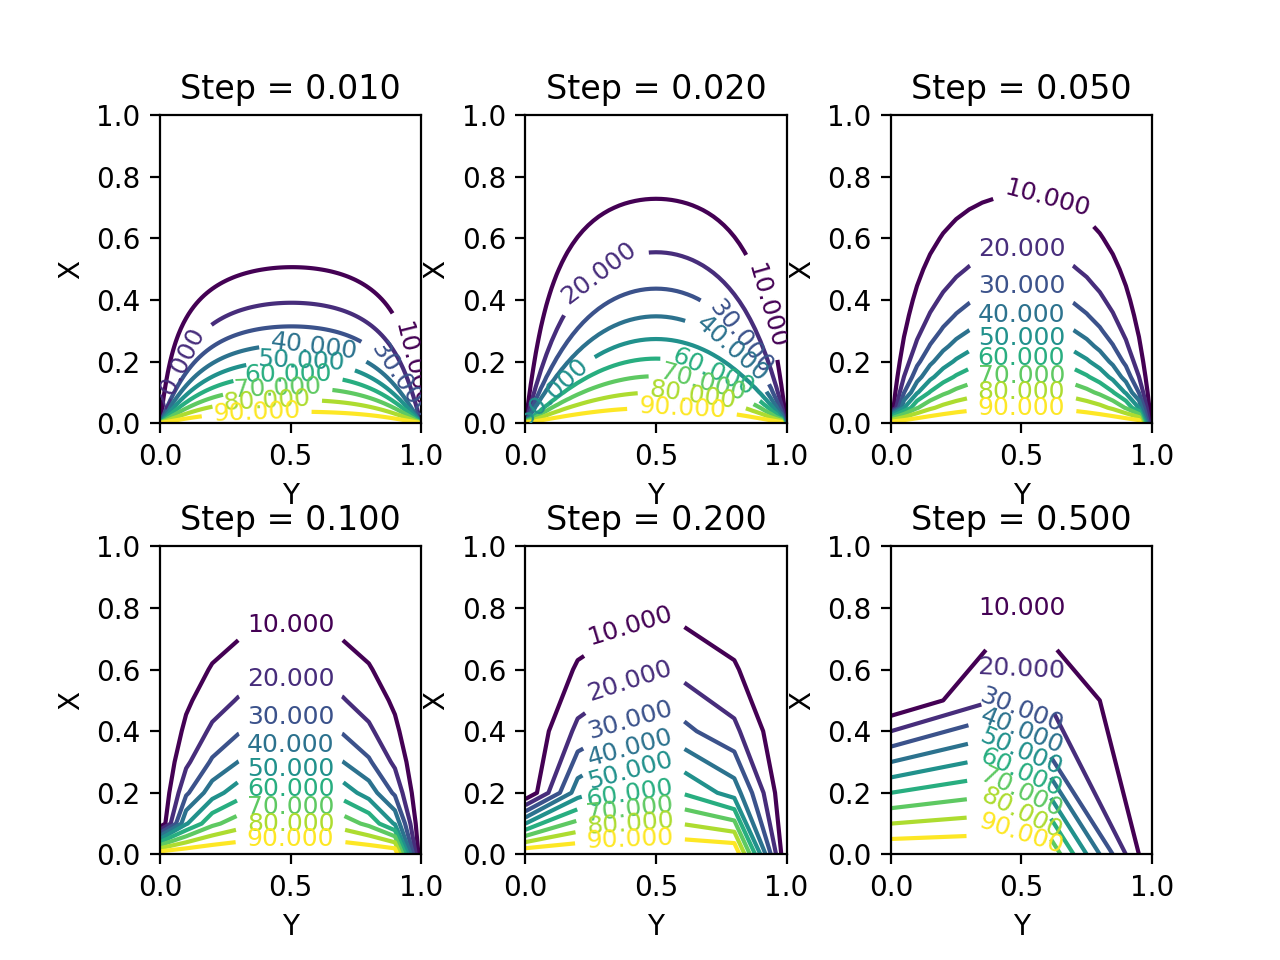

In [2]:
def calculate_square_plate(h):
    L = 1.0
    Nmax = int(L/h +0.5) + 1
    Niter = 1000
    V = zeros((Nmax, Nmax))   
    
    for k in range(0, Nmax-1): 
        V[0,k] = 100.0
    
    for iter in range(Niter):
        for i in range(1, Nmax-1): 
            for j in range(1,Nmax-1): 
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  

    xi = range(0, Nmax)
    yi = range(0, Nmax)
    XI, YI = meshgrid(xi, yi)   
    x = linspace(0, L, num=Nmax)
    y = linspace(0, L, num=Nmax)
    X, Y = meshgrid(x, y)           

    Z = V.copy()
    return X, Y, Z

def draw(X,Y,Z,h):
    partBcontour = plt.contour(X, Y, Z, levels=linspace(0.,100.,11))
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.title('Step = %0.3f' % h)
    plt.clabel(partBcontour, fontsize=9, inline=1)

print('This will take a minute...')
plt.figure()
nplot = 1
for h in (0.01, 0.02, 0.05, 0.1, 0.2, 0.5):
    X,Y,Z = calculate_square_plate(h)
    subplot(2,3,nplot)
    subplots_adjust(hspace=.4)
    subplots_adjust(wspace=.4)
    draw(X,Y,Z,h)
    nplot += 1
plt.show()

The result for $h=0.5$ is too coarse and inaccurate.  The result for $h=0.2$ seems to be stable but still inaccurate.
On the other end, $h=0.01$ seems to be unstable, since the 10.0 V contour is still moving along the plate.  (It would require more iterations to attain stability.)
Step sizes of $0.1 > h > 0.02$ seem to be stable and accurate.

## (c) Iterate until Convergence

Now we modify the code to iterate until the *relative* changes at each point are less than the desired tolerance.
If even a single point is still changing, we continue iterating until it stops changing significantly.

This will take a while...
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500


<IPython.core.display.Javascript object>


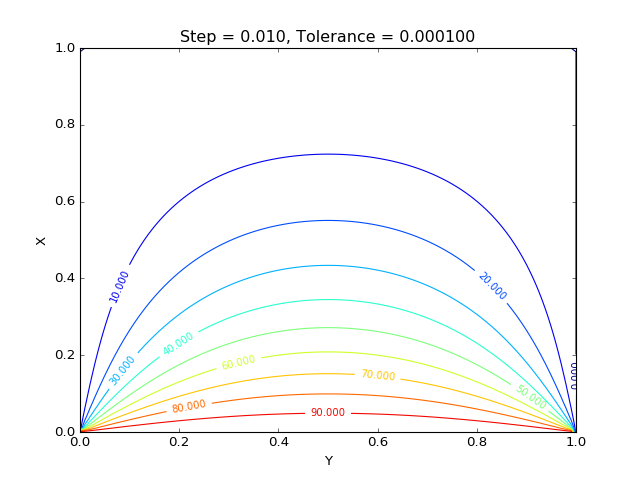

Iteration 500
Iteration 1000
Iteration 1500
Iteration 500


<IPython.core.display.Javascript object>


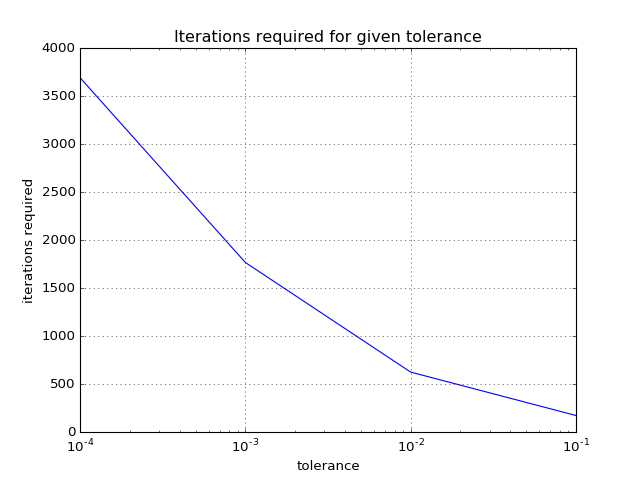

In [23]:
def calculate_square_plate_tolerance(h, tolerance):
    L = 1.0
    Nmax = int(L/h +0.5) + 1
    max_iterations = 100000
    V = zeros((Nmax, Nmax))   
    
    for k in range(0, Nmax-1): 
        V[0,k] = 100.0

    iter = 0
    achieved_tolerance = False
    while (not achieved_tolerance) and (iter < max_iterations):
        iter += 1
        achieved_tolerance = True  # let's hope...
        for i in range(1, Nmax-1): 
            for j in range(1,Nmax-1):
                old_V = V[i,j]
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]) 
                if (abs((V[i,j]-old_V)/V[i,j]) > tolerance):
                    achieved_tolerance = False  # too bad!
        if (iter%500 == 0):
            print('Iteration', iter)

    xi = range(0, Nmax)
    yi = range(0, Nmax)
    XI, YI = meshgrid(xi, yi)   
    x = linspace(0, L, num=Nmax)
    y = linspace(0, L, num=Nmax)
    X, Y = meshgrid(x, y)           

    Z = V.copy()
    return X, Y, Z, iter

def draw(X,Y,Z,h,tolerance):
    partCcontour = plt.contour(X, Y, Z, levels=linspace(0.,100.,11))
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.title('Step = %0.3f, Tolerance = %f' % (h, tolerance))
    plt.clabel(partCcontour, fontsize=9, inline=1)

print('This will take a while...')
nplot = 1
h = 0.01
tolerance = 0.0001
X,Y,Z,iter = calculate_square_plate_tolerance(h, tolerance)
plt.figure()
draw(X,Y,Z,h,tolerance)
plt.show()
tolerance_values = []
iterations_values = []
tolerance_values.append(tolerance)
iterations_values.append(iter)

for tolerance in [0.001, 0.01, 0.1]:
    X,Y,Z,iter = calculate_square_plate_tolerance(h, tolerance)
    tolerance_values.append(tolerance)
    iterations_values.append(iter)

plt.figure()
plt.semilogx(tolerance_values, iterations_values)
plt.grid()
plt.title('Iterations required for given tolerance')
plt.xlabel('tolerance')
plt.ylabel('iterations required')
plt.show()

It seems that the number of iterations required does not change by $1/h$, but it is not quite $1/\sqrt{h}$ either.

## (d) Successive Over-Relaxation

We will implement this using the $\omega$ notation introduced in lecture and the textbook.

$$\bar{U}_{i,j}^{(n)} = \omega U_{i,j}^{(n)} + (1-\omega) U_{i,j}^{(n-1)}$$

Of course we will take the most challenging case with a large number of steps ($h=0.01$) and a very tight tolerance ($t=10^{-4}$).

In [25]:
def calculate_square_plate_tolerance_SOR(h, tolerance, omega):
    L = 1.0
    Nmax = int(L/h +0.5) + 1
    max_iterations = 5000
    V = zeros((Nmax, Nmax))   
    
    for k in range(0, Nmax-1): 
        V[0,k] = 100.0

    iter = 0
    achieved_tolerance = False
    while (not achieved_tolerance) and (iter < max_iterations):
        iter += 1
        achieved_tolerance = True  # let's hope...
        for i in range(1, Nmax-1): 
            for j in range(1,Nmax-1):
                old_V = V[i,j]
                V[i,j] = omega*(0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])) + \
                         (1.-omega)*old_V
                if (abs((V[i,j]-old_V)/V[i,j]) > tolerance):
                    achieved_tolerance = False  # too bad!
        if (iter%500 == 0):
            print('Iteration', iter)

    xi = range(0, Nmax)
    yi = range(0, Nmax)
    XI, YI = meshgrid(xi, yi)   
    x = linspace(0, L, num=Nmax)
    y = linspace(0, L, num=Nmax)
    X, Y = meshgrid(x, y)           

    Z = V.copy()
    return X, Y, Z, iter

omega_values = []
iterations_values = []
h = 0.01
tolerance = 0.0001
print('This will take a while to try several omega values...')
for omega in (1.40, 1.60, 1.80, 1.85, 1.95, 1.98, 2.0):
    (X,Y,Z,iter) = calculate_square_plate_tolerance_SOR(h, tolerance, omega)
    omega_values.append(omega)
    iterations_values.append(iter)

print(omega_values, iterations_values)


This will take a while to try several omega values...
Iteration 500
Iteration 1000
Iteration 1500
Iteration 500
Iteration 1000
Iteration 500
Iteration 500
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
[1.4, 1.6, 1.8, 1.85, 1.95, 1.98, 2.0] [1916, 1239, 622, 468, 246, 733, 5000]


<IPython.core.display.Javascript object>


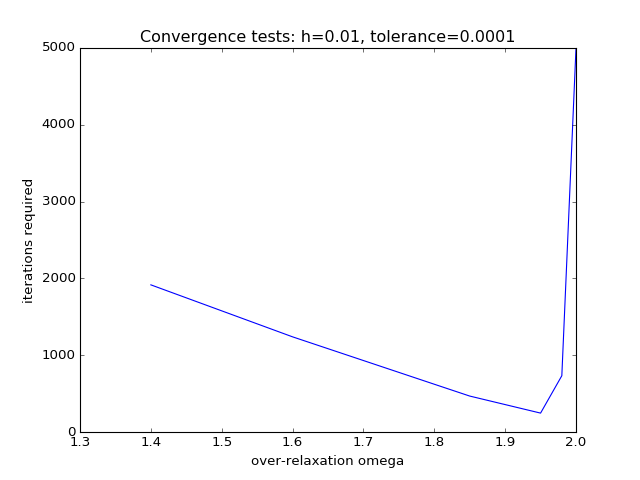

In [165]:
plt.figure()
plt.plot(omega_values, iterations_values)
plt.xlabel('over-relaxation omega')
plt.ylabel('iterations required')
plt.title('Convergence tests: h=0.01, tolerance=0.0001')
plt.show()

It seems that the optimal value is near $\omega=1.95$, but $\omega$ values near 2.0 do not work well.
(Remember that the calculation will not converge for $\omega>2.0$.)
Of course, we should double-check that the result looks reasonable for that optimal value!
We do that check below.

<IPython.core.display.Javascript object>


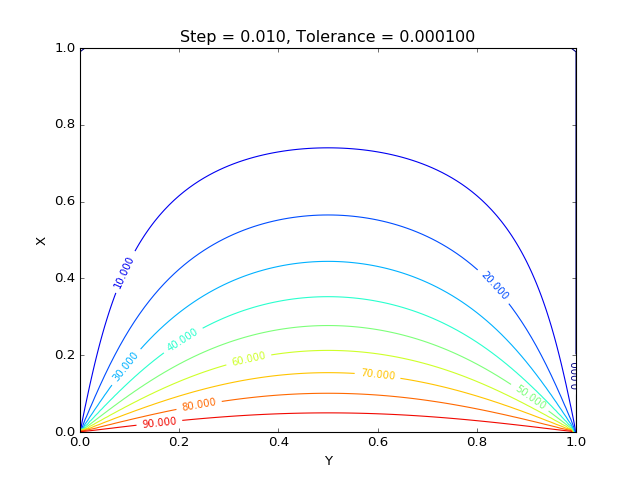

In [70]:
omega = 1.95
(X,Y,Z,iter) = calculate_square_plate_tolerance_SOR(h, tolerance, omega)
plt.figure()
draw(X,Y,Z,h,tolerance)
plt.show()

# Save for part (e)
Xsave = X.copy()
Ysave = Y.copy()
Zsave = Z.copy()

This does look OK, so we conclude that the optimal SOR value in this case is $\omega\approx1.95$.

## (e) Analytic Solution

The analytic solution (Eqn. 19.18) is given as 

$$U(x,y) = \sum_{n=1,3,5,\dots}^\infty \frac{400}{n\pi} \sin\left(\frac{n\pi x}{L} \right) \frac{\sinh (n\pi y/L)}{\sinh(n\pi)}$$

It turns out that this is the result for a boundary condition of $U(x=0,y)=0$ and $U(x,y=L)=100$ instead of $U(x=0,y)=100$, as drawn.

To use this equation, we have to take $x \rightarrow L - y$ and $y \rightarrow x$.  You see this in the code below, where the input $x,y$ values are adjusted.

We cannot take the sum to $\infty$, but we can go as far as we need to reach the desired tolerance.
The trick is that terms alternate in sign, so we have to check the absolute value of the term to see if it is getting close enough to 0.

Another trick, to avoid numerical overflow, is to use the following formula for large $N$ (Eqn. 19.19 in our textbook!):

$$\frac{\sinh(n\pi y/L)}{\sinh(n\pi)} = \frac{e^{n\pi(y/L-1)} - e^{-n\pi(y/L+1)}}{1-e^{-2n\pi}} \longrightarrow e^{n\pi (y/L-1)}$$

This identity improves as $n\rightarrow\infty$, but you might wonder if it is good enough for small values of $y/L$.
We can see from the short test snippet below that it is indeed plenty good enough for even modest values of $ny/L$.
To be safe, we should probably avoid using for the first 20 $n$ values, just in case $y/L$ is small.

In [67]:
for n in range(1,8):
    y = 0.01
    L = 1.0
    exact  = sinh(n*pi*y/L) / sinh(n*pi)
    approx = exp(n*pi*(y/L - 1.))
    print(n, exact, approx, exact-approx)

1 0.00272073804176 0.0445930738413 -0.0418723357995
2 0.000234825030597 0.00198854223462 -0.00175371720402
3 1.523403052e-05 8.86752107047e-05 -7.34411801847e-05
4 8.78773314897e-07 3.95430021885e-06 -3.07552690395e-06
5 4.75392801603e-08 1.7633440165e-07 -1.28795121489e-07
6 2.46968603203e-09 7.86329299353e-09 -5.39360696149e-09
7 1.24778079274e-10 3.50648405096e-10 -2.25870325822e-10


In [3]:
def U_analytic(xin,yin):
    L = 1.
    maxN = 10000
    n = 1
    sum = 0.
    term = 1.
    x = yin   # needed to swap axes
    y = L - xin
    while (abs(term) > 0.0001 * sum) and (n < maxN):
        if n < 20:
            term = 400./n/pi * sin(n*pi*x/L) * sinh(n*pi*y/L) / sinh(n*pi)
        else:
            term = 400./n/pi * sin(n*pi*x/L) * exp(n*pi*(y/L - 1.))
        sum = sum + term
        n = n + 2
    #print('Converged at n =', n)
    return sum

# Quick test
print(U_analytic(0.01, 0.01))  

50.3239692885


<IPython.core.display.Javascript object>


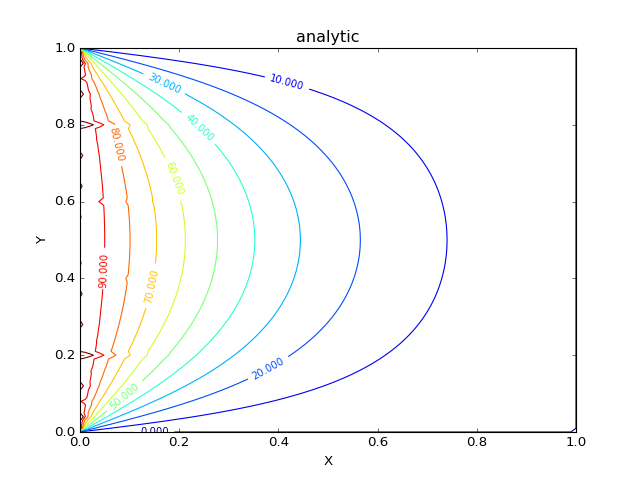

<IPython.core.display.Javascript object>


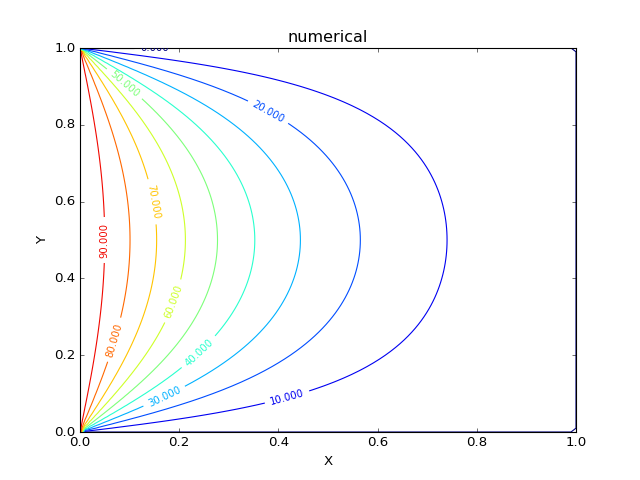

In [91]:
U = zeros((len(Xsave), len(Ysave)))
for i in range(len(Xsave)):
    for j in range(len(Ysave)):
        #print(i,j, Xsave[i,j], Ysave[i,j], U_analytic(Xsave[i,j],Ysave[i,j]))
        U[i,j] = U_analytic(Xsave[i,j],Ysave[i,j])

plt.figure()
partEcontour = plt.contour(Xsave, Ysave, U, levels=linspace(0.,100.,11))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('analytic')
plt.clabel(partEcontour, fontsize=9, inline=1)
plt.show()

plt.figure()
partE2contour = plt.contour(Ysave, Xsave, Zsave, levels=linspace(0.,100.,11))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('numerical')
plt.clabel(partE2contour, fontsize=9, inline=1)
plt.show()

Even without any difference calculation, we can conclude that the results are similar.